Training data shape: (60000, 28, 28, 1)
Testing data shape: (10000, 28, 28, 1)
Epoch 1/10
1875/1875 [==============================] - 103s 53ms/step - loss: 0.1779 - accuracy: 0.9474 - val_loss: 0.0596 - val_accuracy: 0.9806
Epoch 2/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0649 - accuracy: 0.9799 - val_loss: 0.0464 - val_accuracy: 0.9840
Epoch 3/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0446 - accuracy: 0.9860 - val_loss: 0.0391 - val_accuracy: 0.9864
Epoch 4/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0330 - accuracy: 0.9896 - val_loss: 0.0352 - val_accuracy: 0.9883
Epoch 5/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0252 - accuracy: 0.9918 - val_loss: 0.0375 - val_accuracy: 0.9878
Epoch 6/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0192 - accuracy: 0.9937 - val_loss: 0.0368 - val_accuracy: 0.9878
Epoch 7/10
1875/1875 [======================

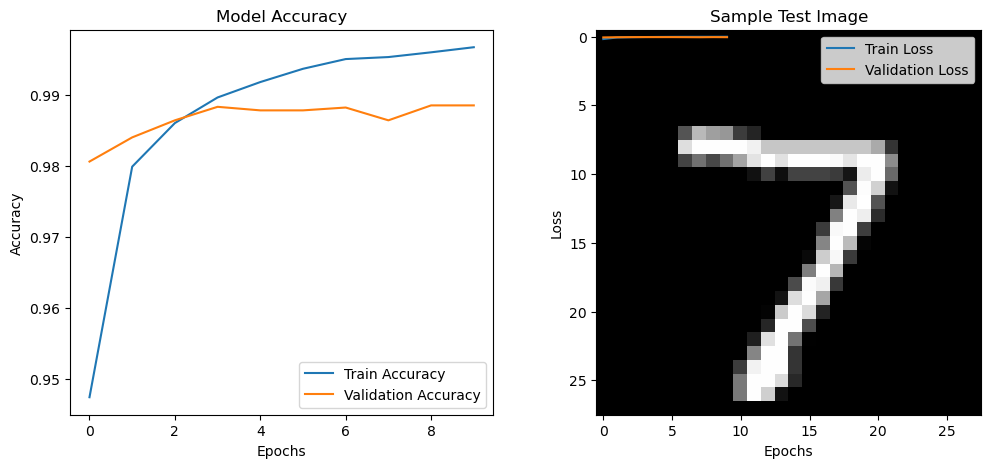

1/1 [==============================] - 0s 227ms/step
🎯 Predicted class: 7
✅ Actual class: 7


In [1]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Flatten, Dense, Conv2D, Dropout, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Test Accuracy: {test_acc*100:.2f}%")
print(f"🧩 Test Loss: {test_loss:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

image = x_test[0]
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title("Sample Test Image")
plt.show()

image = np.expand_dims(image, axis=0)
prediction = model.predict(image)
predicted_class = np.argmax(prediction)

print("🎯 Predicted class:", predicted_class)
print("✅ Actual class:", y_test[0])